In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_data = [
  ['good', True],
  ['bad', False],
  ['happy', True],
  ['sad', False],
  ['not good', False],
  ['not bad', True],
  ['not happy', False],
  ['not sad', True],
  ['very good', True],
  ['very bad', False],
  ['very happy', True],
  ['very sad', False],
  ['i am happy', True],
  ['this is good', True],
  ['i am bad', False],
  ['this is bad', False],
  ['i am sad', False],
  ['this is sad', False],
  ['i am not happy', False],
  ['this is not good', False],
  ['i am not bad', True],
  ['this is not sad', True],
  ['i am very happy', True],
  ['this is very good', True],
  ['i am very bad', False],
  ['this is very sad', False],
  ['this is very happy', True],
  ['i am good not bad', True],
  ['this is good not bad', True],
  ['i am bad not good', False],
  ['i am good and happy', True],
  ['this is not good and not happy', False],
  ['i am not at all good', False],
  ['i am not at all bad', True],
  ['i am not at all happy', False],
  ['this is not at all sad', True],
  ['this is not at all happy', False],
  ['i am good right now', True],
  ['i am bad right now', False],
  ['this is bad right now', False],
  ['i am sad right now', False],
  ['i was good earlier', True],
  ['i was happy earlier', True],
  ['i was bad earlier', False],
  ['i was sad earlier', False],
  ['i am very bad right now', False],
  ['this is very good right now', True],
  ['this is very sad right now', False],
  ['this was bad earlier', False],
  ['this was very good earlier', True],
  ['this was very bad earlier', False],
  ['this was very happy earlier', True],
  ['this was very sad earlier', False],
  ['i was good and not bad earlier', True],
  ['i was not good and not happy earlier', False],
  ['i am not at all bad or sad right now', True],
  ['i am not at all good or happy right now', False],
  ['this was not happy and not good earlier', False],
]

test_data = [
  ['this is happy', True],
  ['i am good', True],
  ['this is not happy', False],
  ['i am not good', False],
  ['this is not bad', True],
  ['i am not sad', True],
  ['i am very good', True],
  ['this is very bad', False],
  ['i am very sad', False],
  ['this is bad not good', False],
  ['this is good and happy', True],
  ['i am not good and not happy', False],
  ['i am not at all sad', True],
  ['this is not at all good', False],
  ['this is not at all bad', True],
  ['this is good right now', True],
  ['this is sad right now', False],
  ['this is very bad right now', False],
  ['this was good earlier', True],
  ['i was not happy and not good earlier', False],
  ['earlier i was good and not bad', True],
]

In [3]:
N_train = len(train_data)
N_test = len(test_data)
print(N_train, "training sentences.")
print(N_test, "test sentences.")

sentence = "I fear this exercise will be difficult"
print(sentence.split(" "))

vocabulary = list(set([w for pair in train_data for w in pair[0].split(' ')]))
print('Unique words found', len(vocabulary)) # 18 unique words found

nb_words = np.max([len(pair[0].split(' ')) for pair in train_data])
print("Maximum sequence length:", nb_words)

58 training sentences.
21 test sentences.
['I', 'fear', 'this', 'exercise', 'will', 'be', 'difficult']
Unique words found 18
Maximum sequence length: 10


In [4]:
def one_hot_encoding(word, vocabulary):
    r = np.zeros(len(vocabulary))
    r[vocabulary.index(word)] = 1.0
    return r

In [5]:
X_train = np.zeros((N_train, nb_words, len(vocabulary)))


def prepare_data(data, vocabulary, nb_words):
    N = len(data)
    X = np.zeros((N, nb_words, len(vocabulary)))
    T = np.zeros((N,))

    # Iterate over the data
    for i in range(N):
        x, t = data[i]
        # Transform the sentence
        words = x.split(" ")
        for j in range(len(words)):
            word = words[j]
            encoding = one_hot_encoding(word, vocabulary)
            X[i, -len(words) + j, :] = encoding
        # Transform the output
        T[i] = int(t)
    return X, T

X_train, T_train = prepare_data(train_data, vocabulary, nb_words)
X_test, T_test = prepare_data(test_data, vocabulary, nb_words)
print(X_train.shape)
print(T_train.shape)
print(X_test.shape)
print(T_test.shape)

(58, 10, 18)
(58,)
(21, 10, 18)
(21,)


In [6]:
def small_model():
    tf.keras.backend.clear_session()

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Input((nb_words, len(vocabulary))))

    model.add(tf.keras.layers.LSTM(10))

    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
    print(model.summary())
    return model


model = small_model()

history = tf.keras.callbacks.History()

model.fit(X_train, T_train, validation_data=(X_test, T_test), epochs=30, batch_size=10, callbacks=[history])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                1160      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1171 (4.57 KB)
Trainable params: 1171 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30
6/6 [==============================] - 3s 151ms/step - loss: 0.6927 - binary_accuracy: 0.5000 - val_loss: 0.6925 - val_binary_accuracy: 0.4286
Epoch 2/30
6/6 [==============================] - 0s 9ms/step - loss: 0.6815 - binary_accuracy: 0.6552 - val_loss: 0.6953 - val_binary_accuracy: 0.5714
Epoch 3/30
6/6 [==============================] - 0s 13ms/step - loss: 0.6735 - binary_accuracy: 0.6207 - val

Test loss: 0.04090629145503044
Test accuracy: 1.0


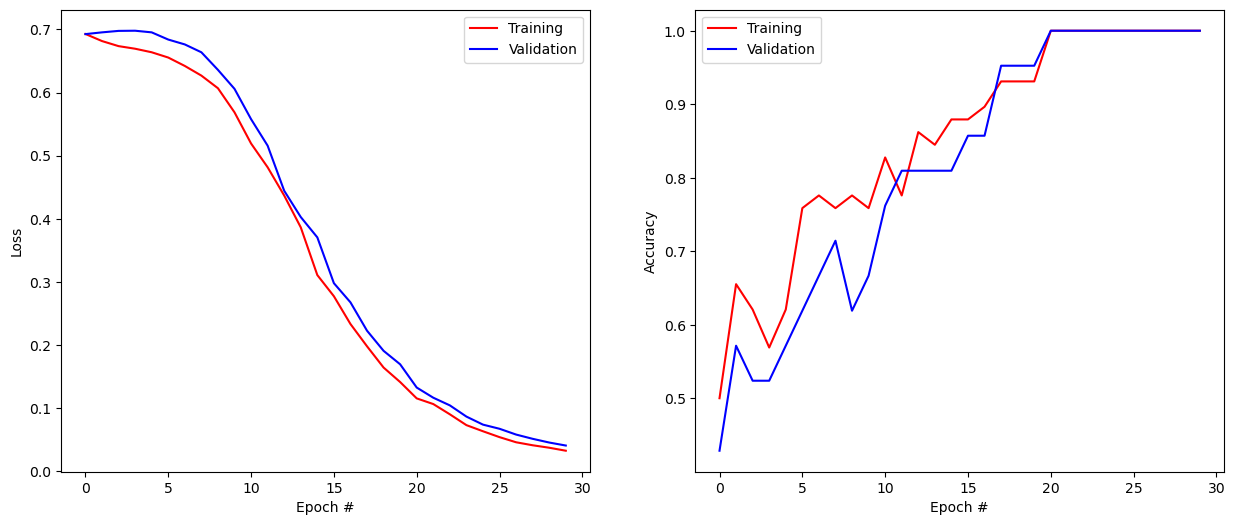

In [7]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['binary_accuracy'], '-r', label="Training")
plt.plot(history.history['val_binary_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [8]:
def big_model():
    tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input((nb_words, len(vocabulary))))
    model.add(tf.keras.layers.LSTM(20, return_sequences=True))
    model.add(tf.keras.layers.LSTM(10, return_sequences=False))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
    print(model.summary())
    return model

model = big_model()

history = tf.keras.callbacks.History()

model.fit(X_train, T_train, validation_data=(X_test, T_test), epochs=30, batch_size=10, callbacks=[history])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            3120      
                                                                 
 lstm_1 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 4371 (17.07 KB)
Trainable params: 4371 (17.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/30
6/6 [==============================] - 4s 160ms/step - loss: 0.6968 - binary_accuracy: 0.5172 - val_loss: 0.6944 - val_binary_accuracy: 0.4762
Epoch 2/30
6/6 [==============================] - 0s 12ms/step - loss: 0.6883 - binary_accuracy: 0.5517 - val_loss: 0.6957 - va

Test loss: 0.00593061838299036
Test accuracy: 1.0


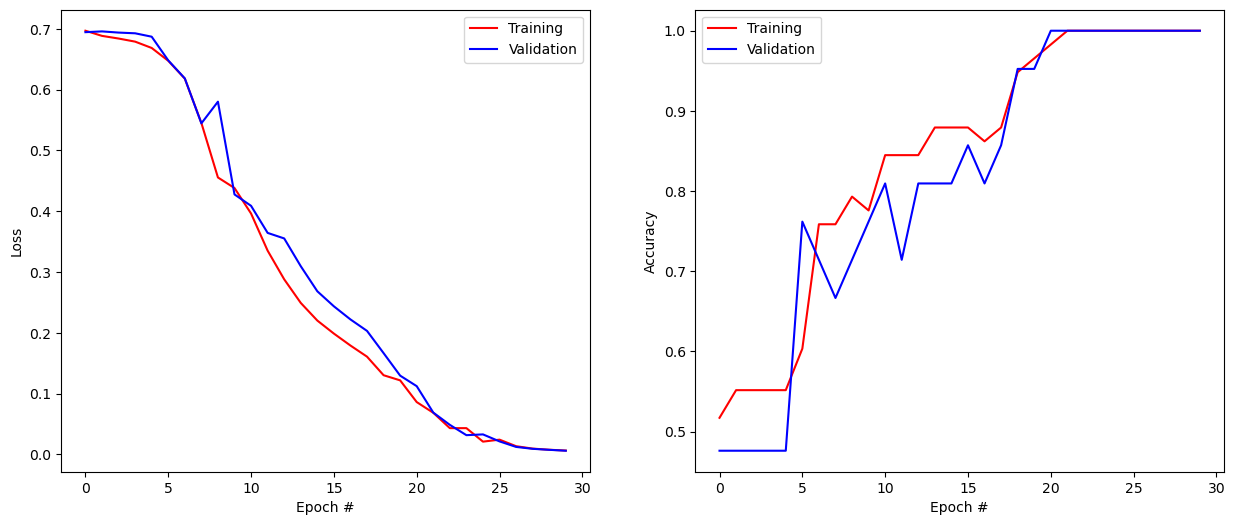

In [9]:
score = model.evaluate(X_test, T_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(figsize=(15, 6))

plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['binary_accuracy'], '-r', label="Training")
plt.plot(history.history['val_binary_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()

plt.show()